In [ ]:
!nvidia-smi

Thu Mar 27 05:46:14 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   53C    P0             27W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import os

# project_path = "/content/drive/MyDrive/FireDetection"
# dataset_path = f"{project_path}/datasets"

# # Tạo thư mục nếu chưa có
# os.makedirs(project_path, exist_ok=True)
# os.makedirs(dataset_path, exist_ok=True)

# print(f"Thư mục dự án: {project_path}")
# print(f"Thư mục dataset: {dataset_path}")


In [ ]:
import os
HOME = os.getcwd()
print(f"HOME Directory: {HOME}")

HOME Directory: /content


In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.5/112.6 GB disk)


In [ ]:
# Tạo thư mục lưu dataset nếu chưa có
dataset_path = f"{HOME}/datasets"
os.makedirs(dataset_path, exist_ok=True)

# Chuyển vào thư mục dataset
%cd {dataset_path}

/content/datasets


In [ ]:
# Cài đặt Roboflow
!pip install roboflow

# Tải dataset từ Roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="EhU2k1Vto69bouSzbqTD")
project = rf.workspace("custom-thxhn").project("fire-wrpgm")
version = project.version(8)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
# Chuyển về thư mục chính
%cd {HOME}

# Đường dẫn file data.yaml của dataset
data_yaml_path = f"{dataset_path}/fire-8/data.yaml"
!yolo task=detect mode=train model="/content/drive/MyDrive/yolo11n.pt" data={data_yaml_path} epochs=50 imgsz=640 lr0=0.01 hsv_h=0.015 hsv_s=0.7 hsv_v=0.4 batch=16 plots=True
#!yolo task=detect mode=train model="/content/drive/MyDrive/yolo11n.pt" data={data_yaml_path} epochs=10 imgsz=640 plots=True


/content
Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/yolo11n.pt, data=/content/datasets/fire-8/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sho

In [ ]:
!ls {dataset_path}/fire-8

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [ ]:
!ls {HOME}/runs/detect/train2/

args.yaml					    PR_curve.png	 train_batch2202.jpg
confusion_matrix_normalized.png			    R_curve.png		 train_batch2.jpg
confusion_matrix.png				    results.csv		 val_batch0_labels.jpg
events.out.tfevents.1743054395.a10cbd9365b7.2879.0  results.png		 val_batch0_pred.jpg
F1_curve.png					    train_batch0.jpg	 val_batch1_labels.jpg
labels_correlogram.jpg				    train_batch1.jpg	 val_batch1_pred.jpg
labels.jpg					    train_batch2200.jpg  weights
P_curve.png					    train_batch2201.jpg


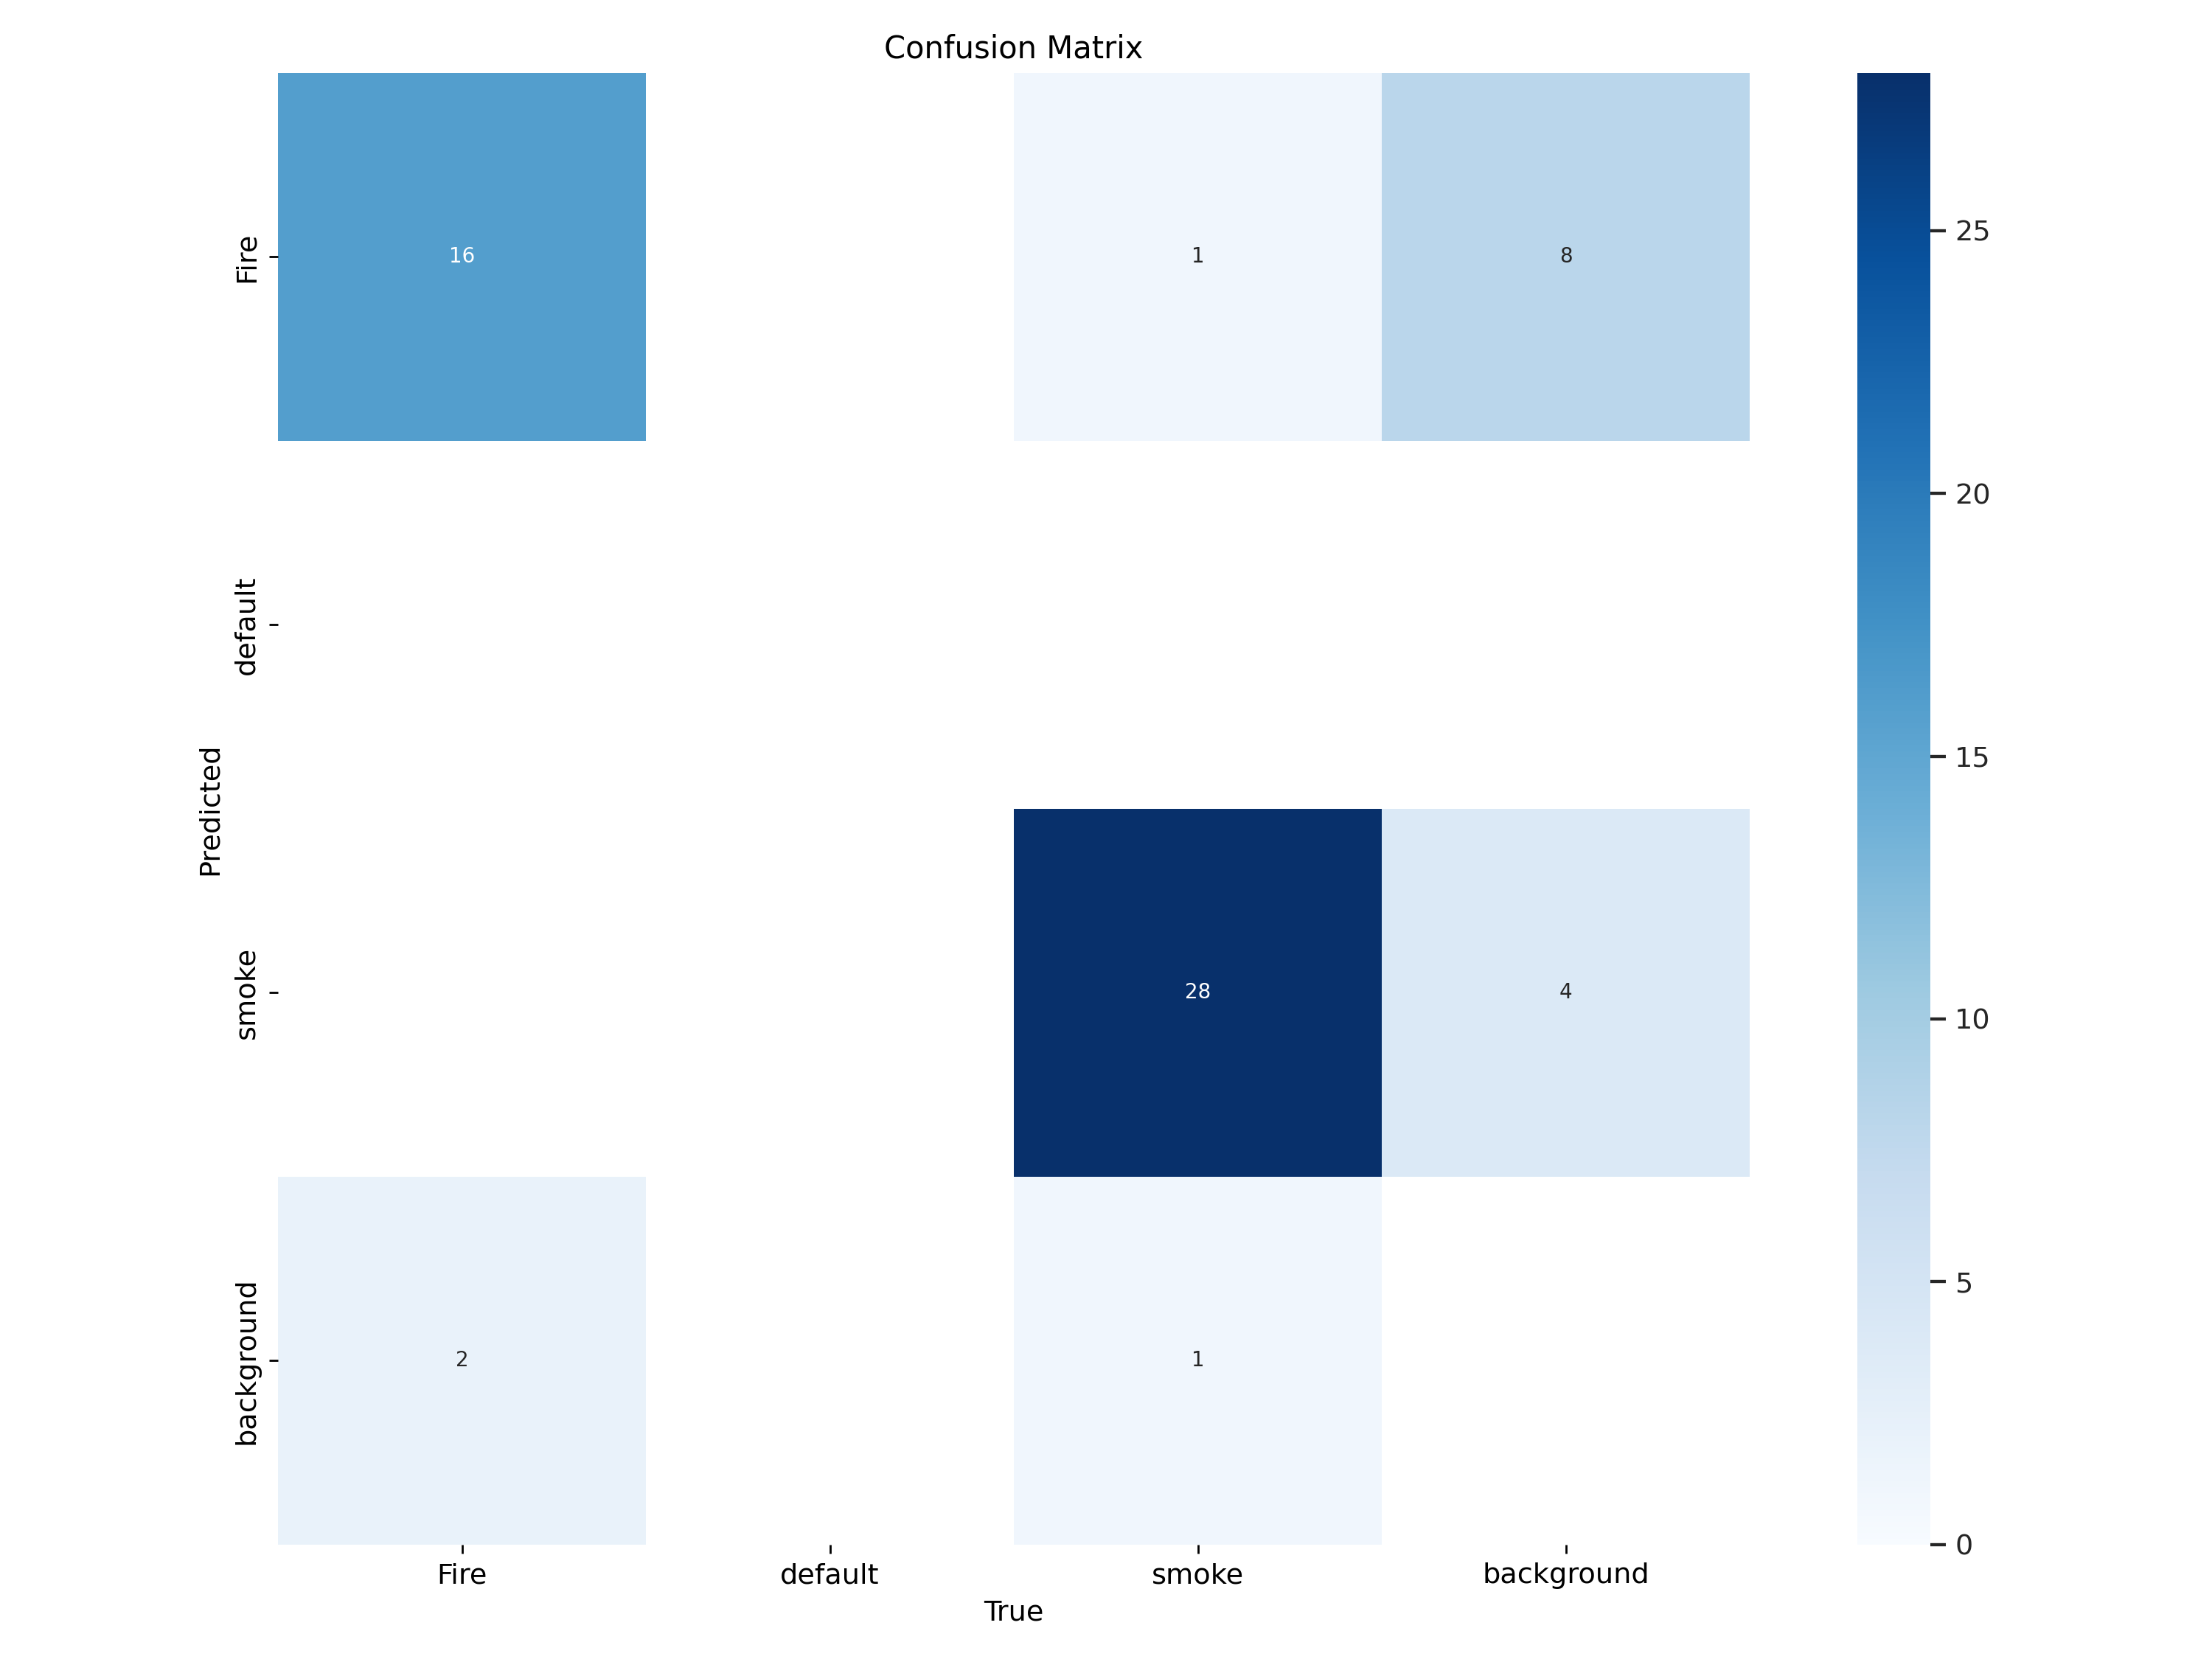

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

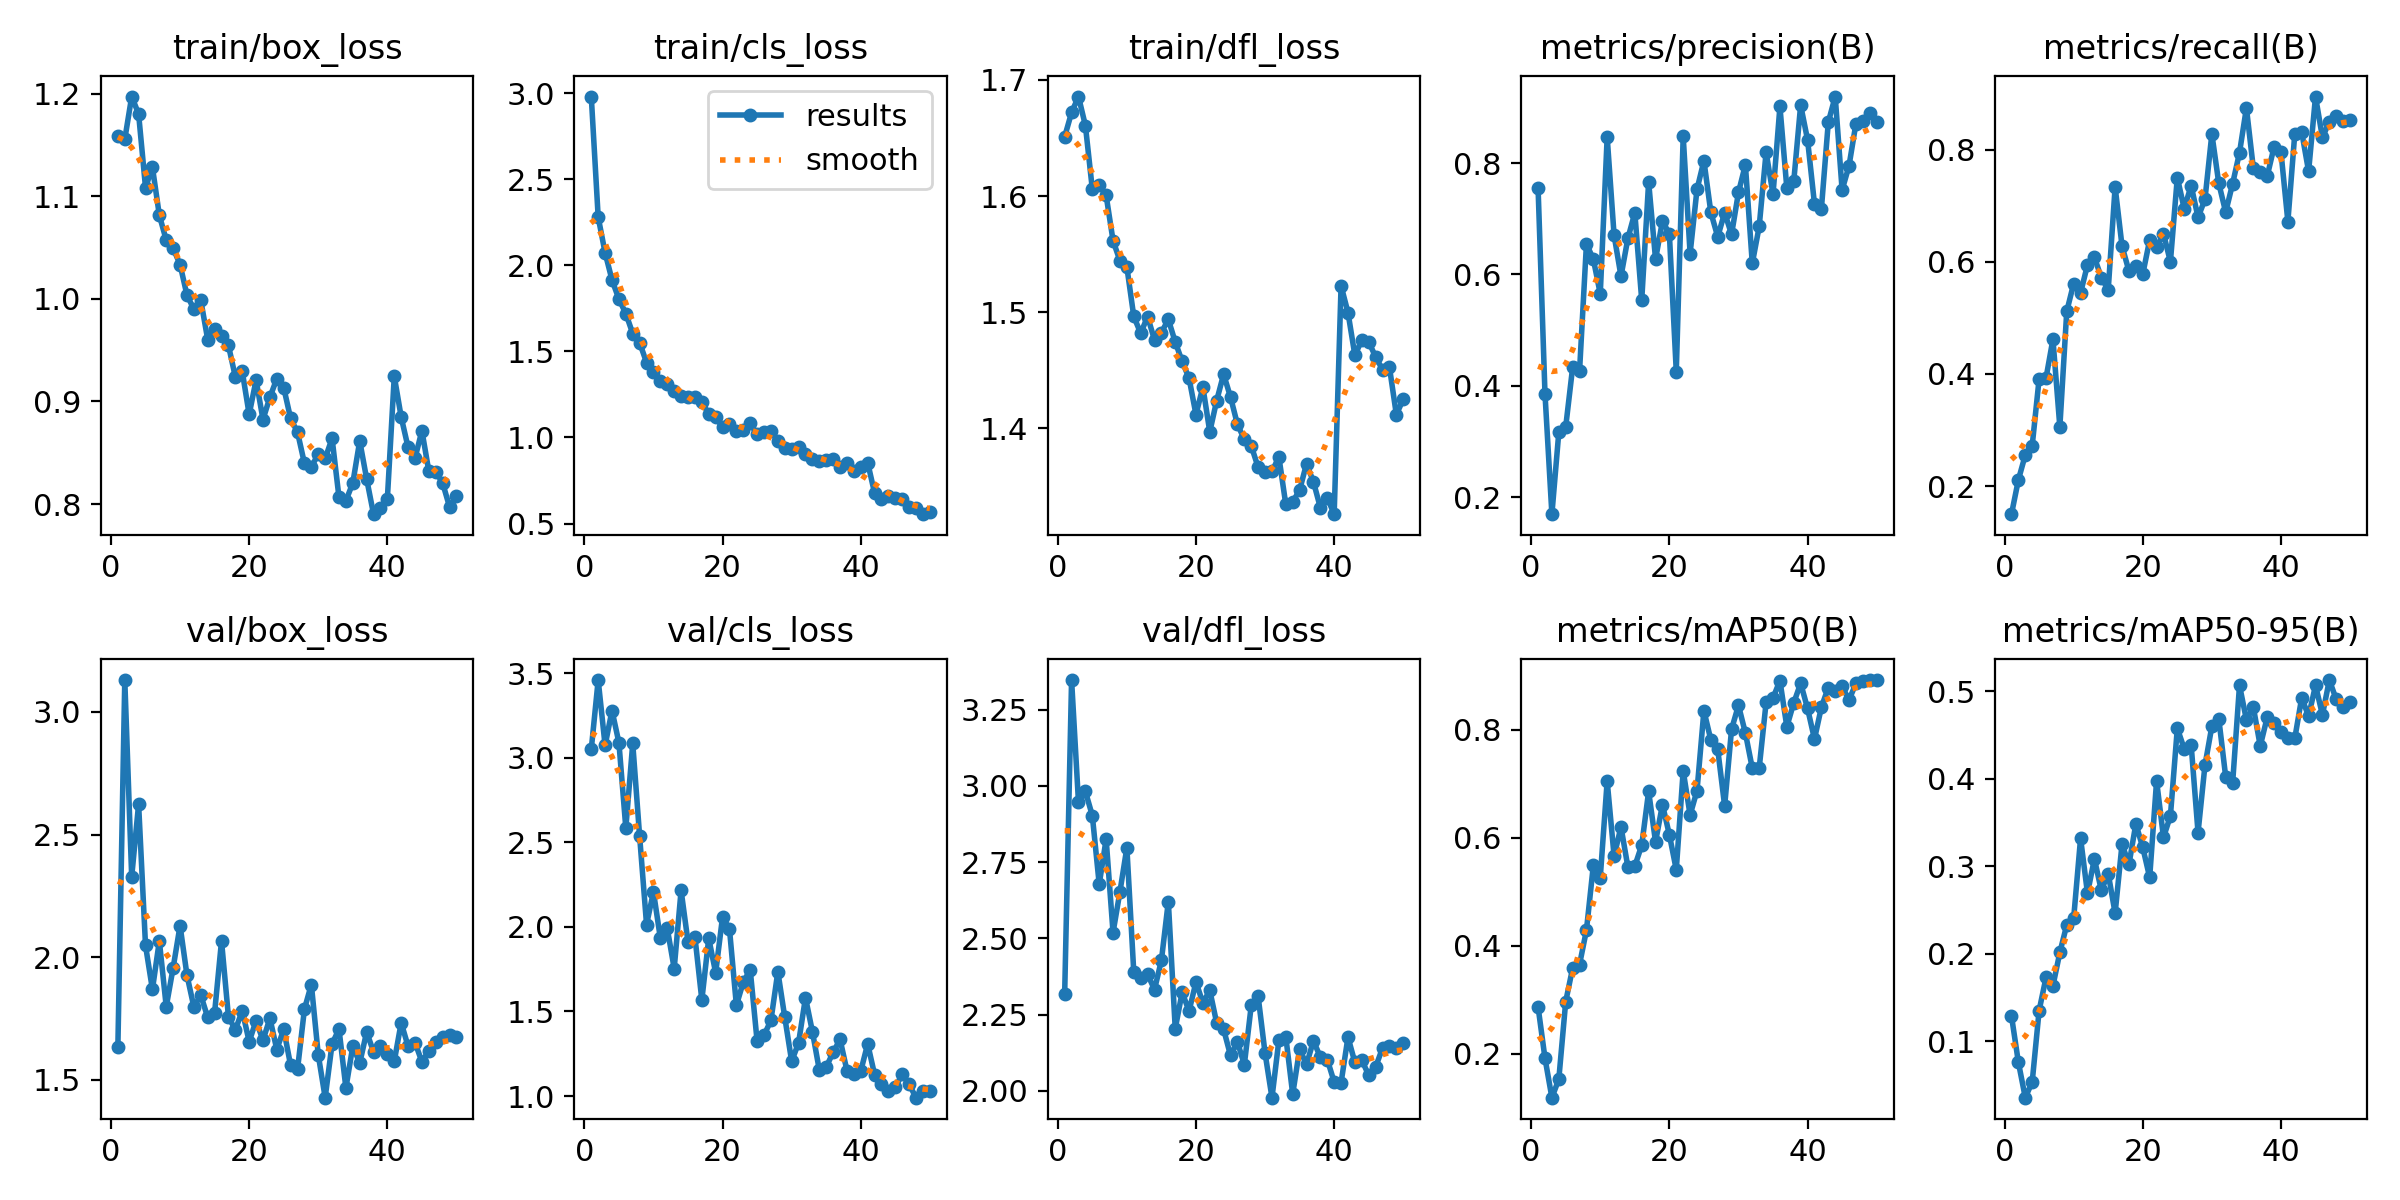

In [ ]:
IPyImage(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

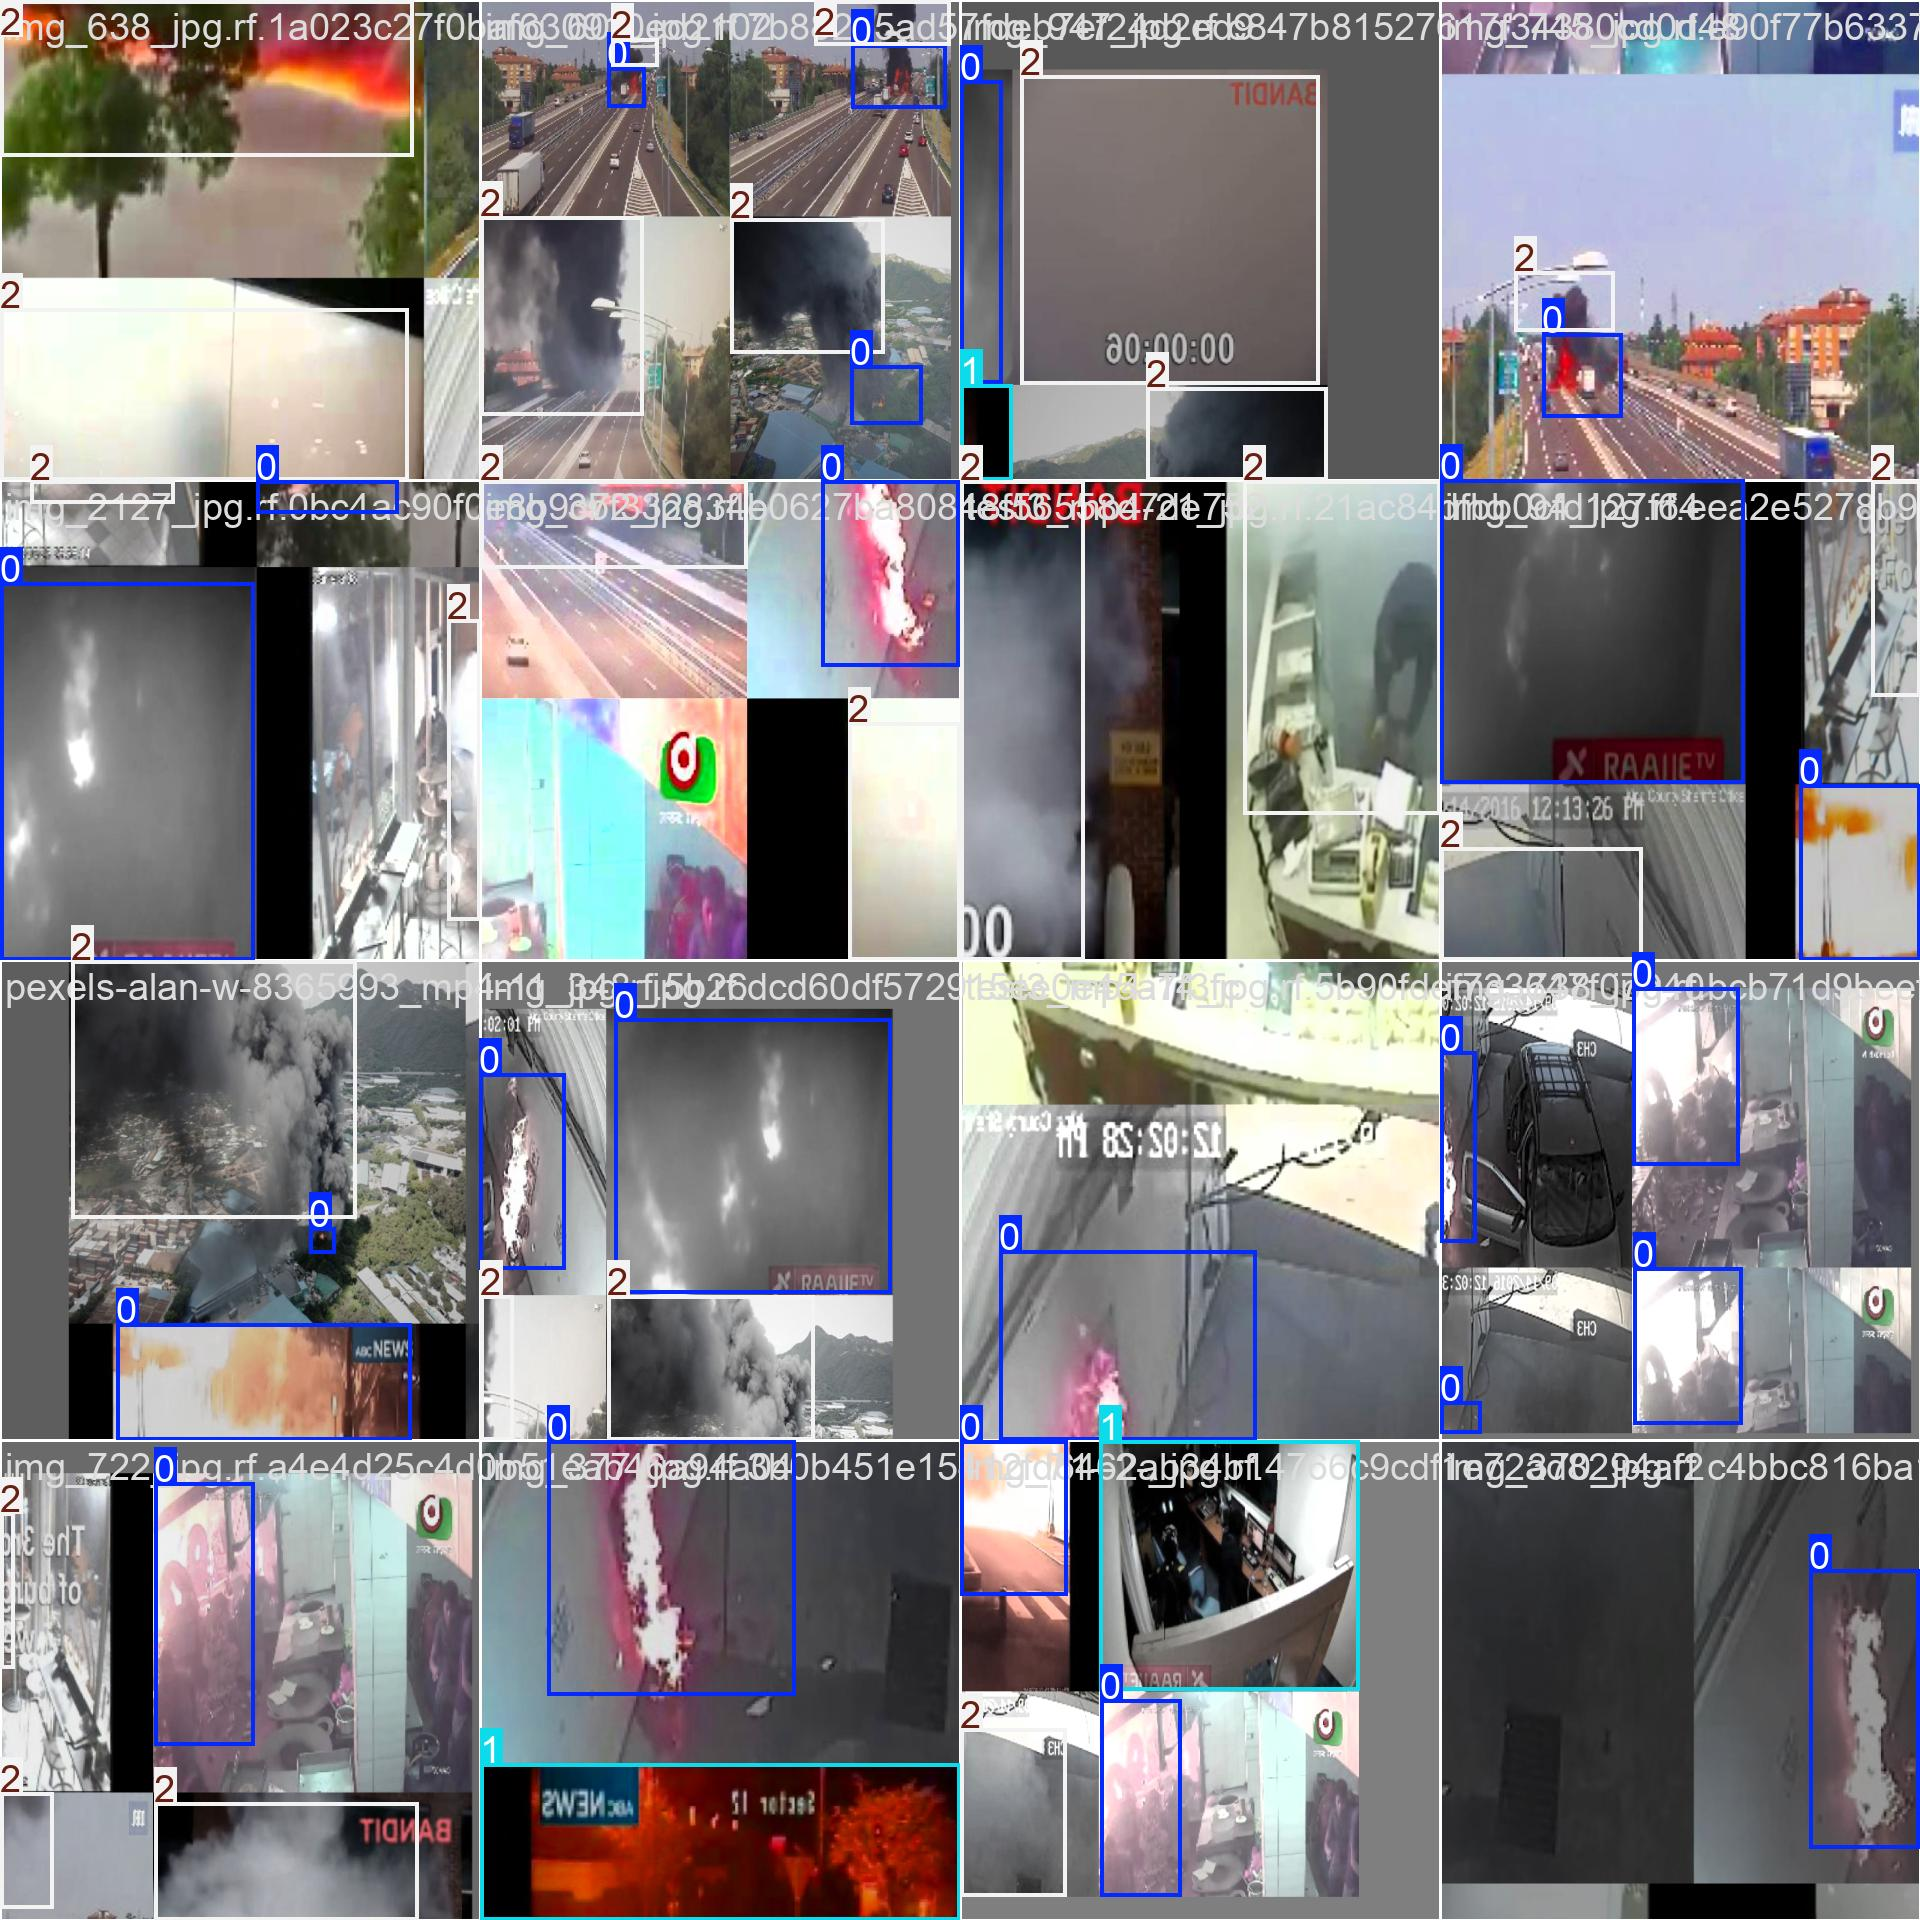

In [ ]:
IPyImage(filename=f'{HOME}/runs/detect/train2/train_batch2.jpg', width=600)

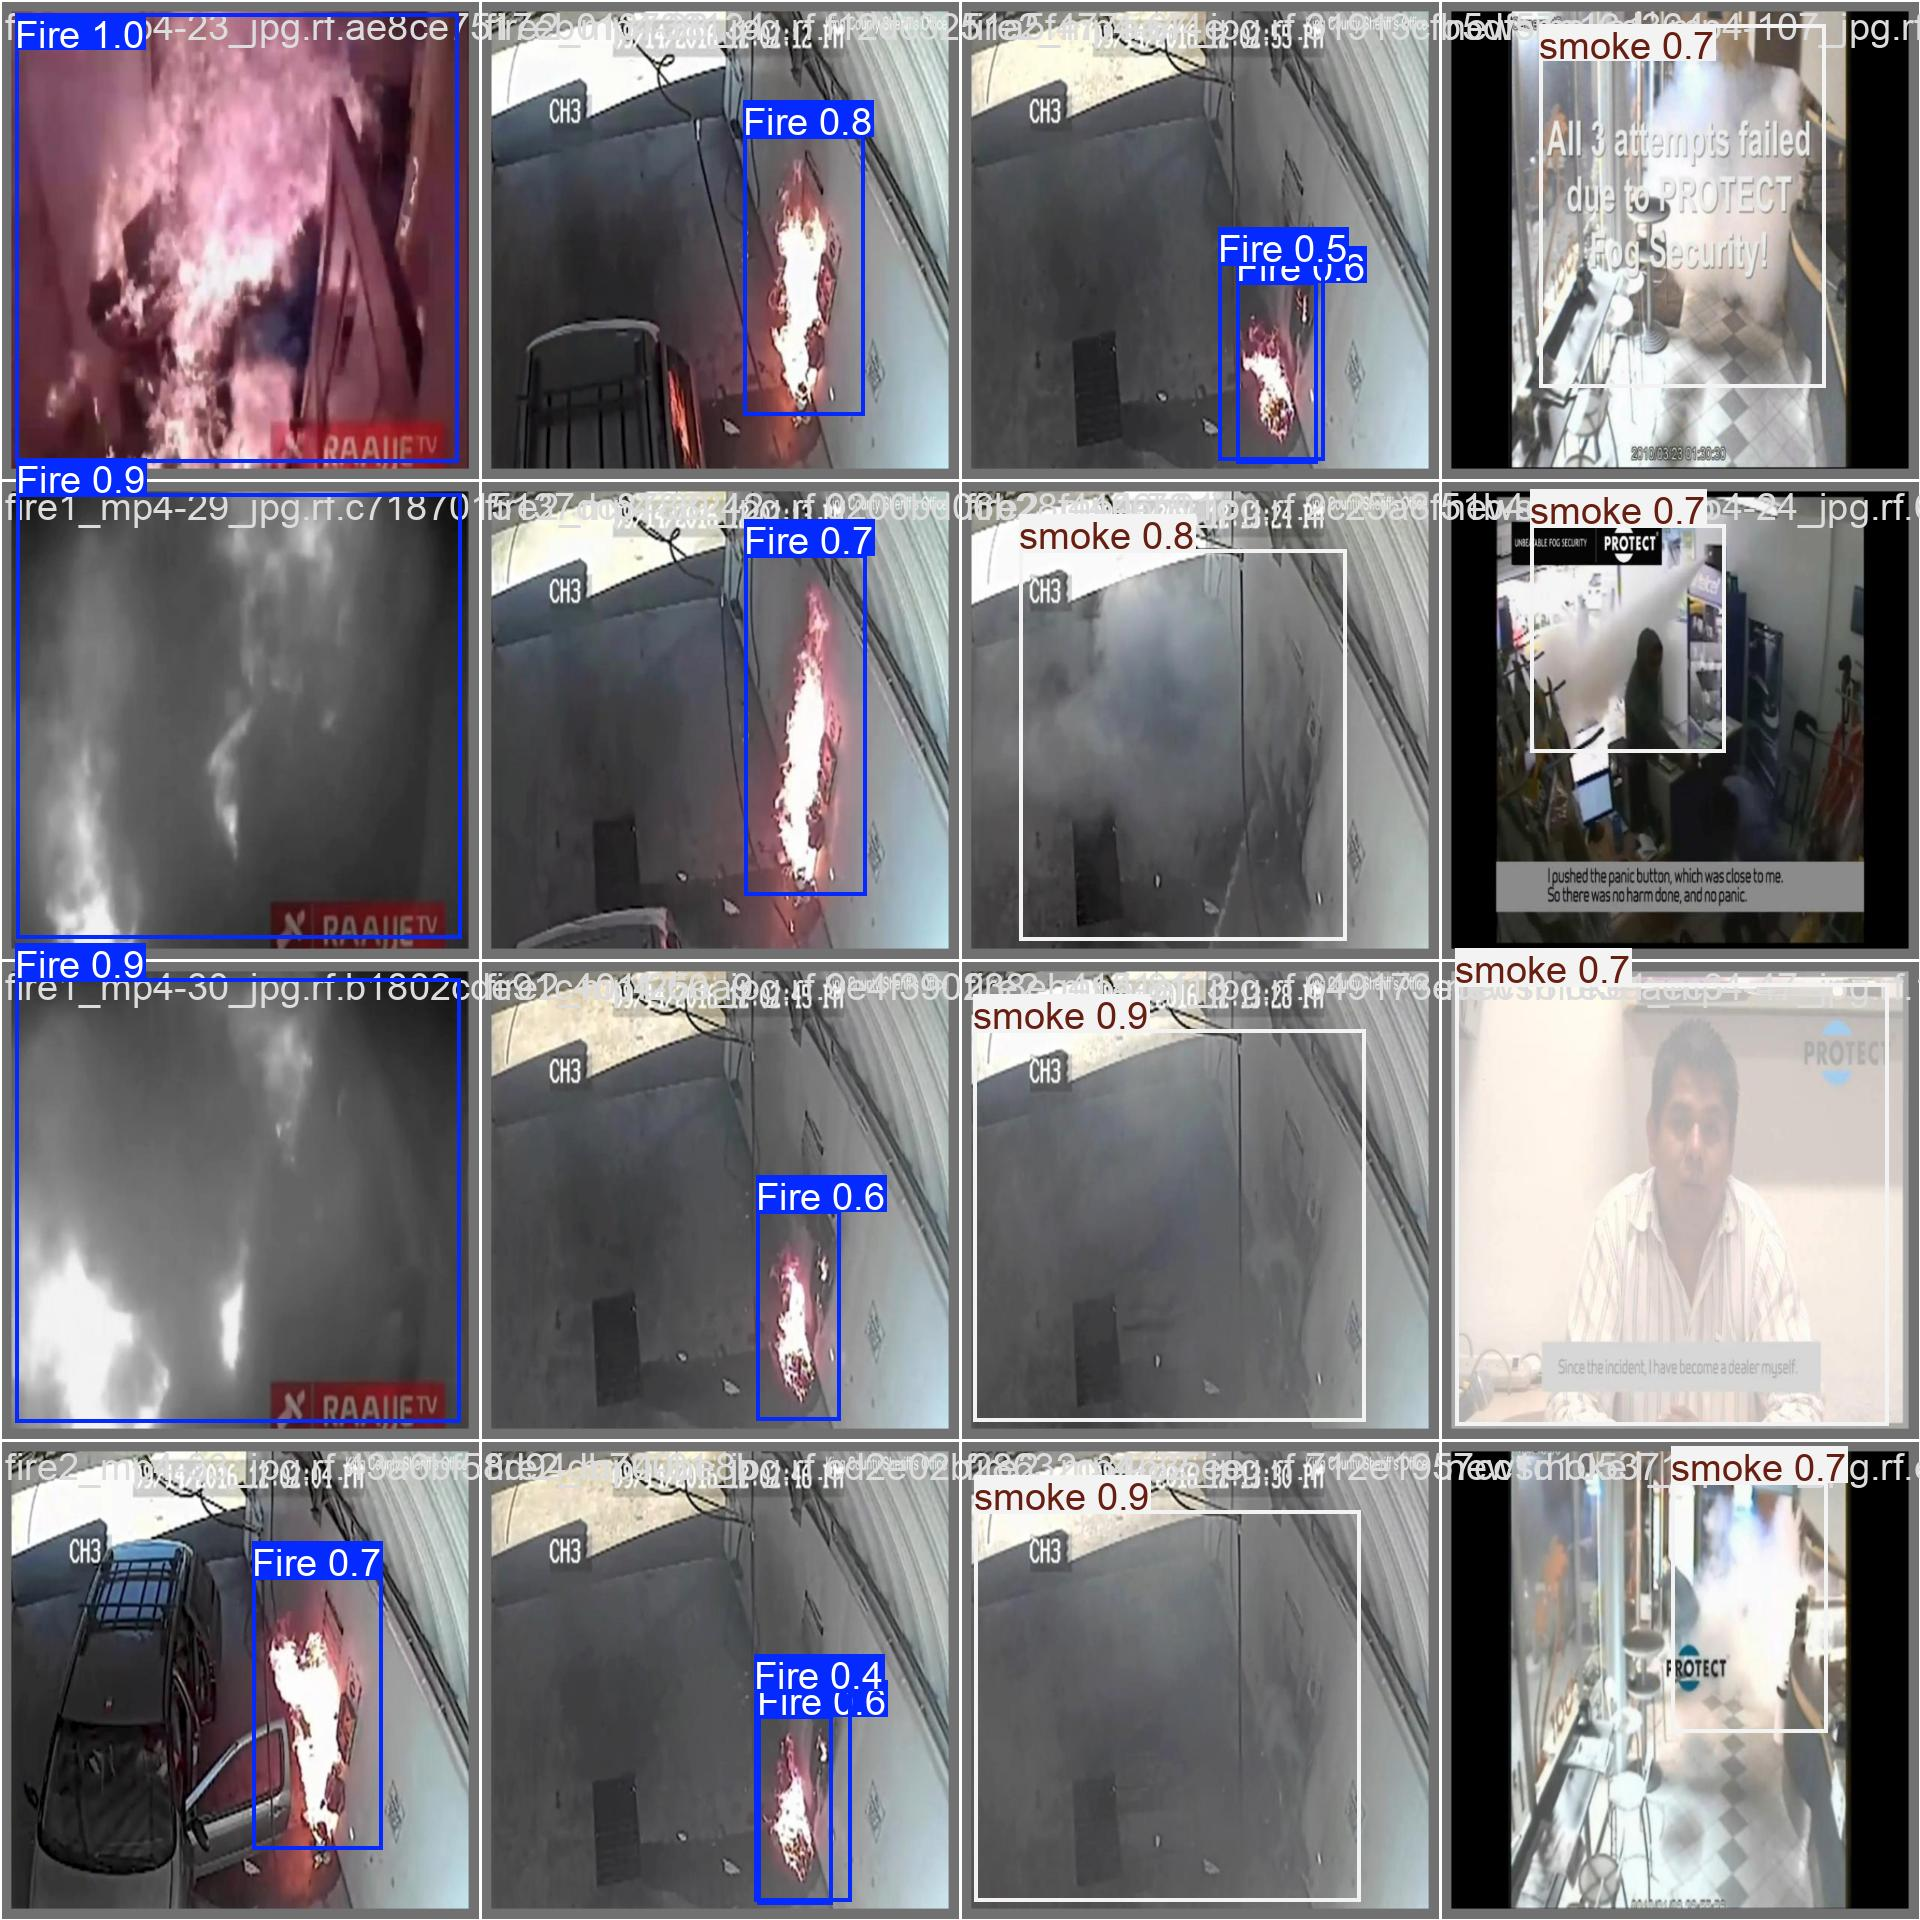

In [ ]:
IPyImage(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/datasets/fire-8/valid/labels.cache... 47 images, 0 backgrounds, 0 corrupt: 100% 47/47 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:01<00:00,  2.02it/s]
                   all         47         48      0.871       0.85      0.885      0.513
                  Fire         17         18      0.814      0.833       0.84      0.419
                 smoke         30         30      0.929      0.866      0.931      0.607
Speed: 6.2ms preprocess, 8.5ms inference, 0.0ms loss, 5.3ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs

image 1/55 /content/datasets/fire-8/test/images/fire1_mp4-26_jpg.rf.5a09c11c9facf23a9413ca63bc2a6085.jpg: 640x640 1 Fire, 11.4ms
image 2/55 /content/datasets/fire-8/test/images/fire2_mp4-29_jpg.rf.42a82dddeb68db98ca428fdf902c9e66.jpg: 640x640 2 Fires, 9.0ms
image 3/55 /content/datasets/fire-8/test/images/fire2_mp4-37_jpg.rf.742a554b0f0772dc0fb772be8648477c.jpg: 640x640 1 Fire, 8.3ms
image 4/55 /content/datasets/fire-8/test/images/fire2_mp4-50_jpg.rf.07b08a19a25759f464ebccd1158f1d23.jpg: 640x640 1 Fire, 8.3ms
image 5/55 /content/datasets/fire-8/test/images/fire2_mp4-51_jpg.rf.09ddf16d6c4c8117c7a4a5f26f796a44.jpg: 640x640 1 Fire, 8.5ms
image 6/55 /content/datasets/fire-8/test/images/fire2_mp4-56_jpg.rf.1e9523e7b497838a4e40d80da90084d6.jpg: 640x640 1 Fire, 8.1ms
image 7/55 /content/datasets/fire-8/test/images/fire2_mp4-59_jpg

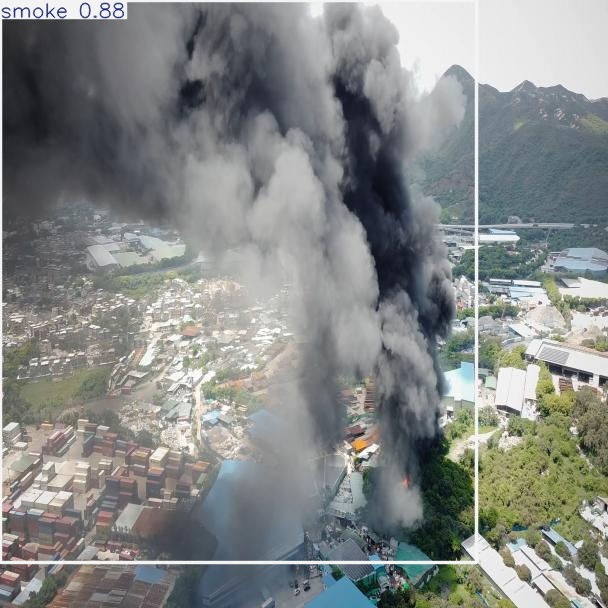

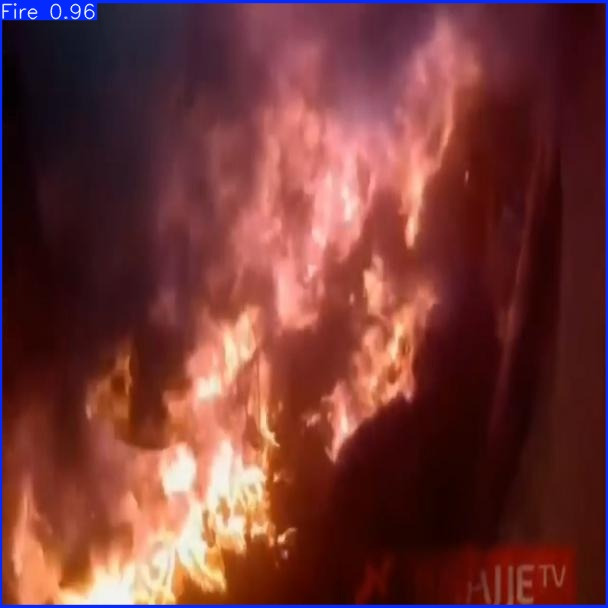

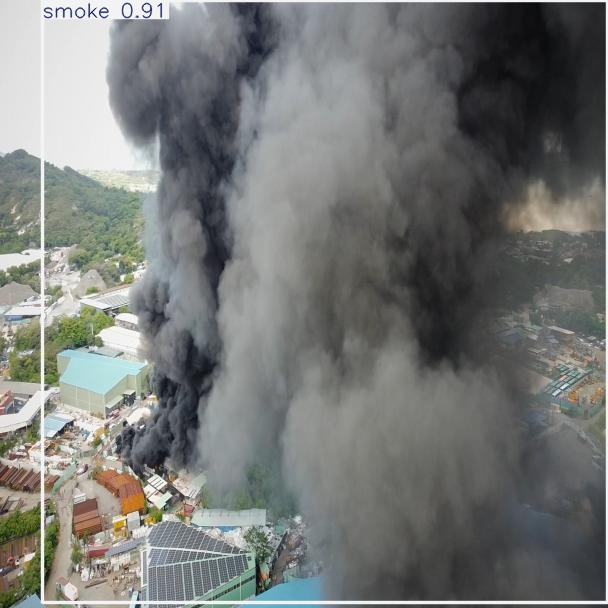

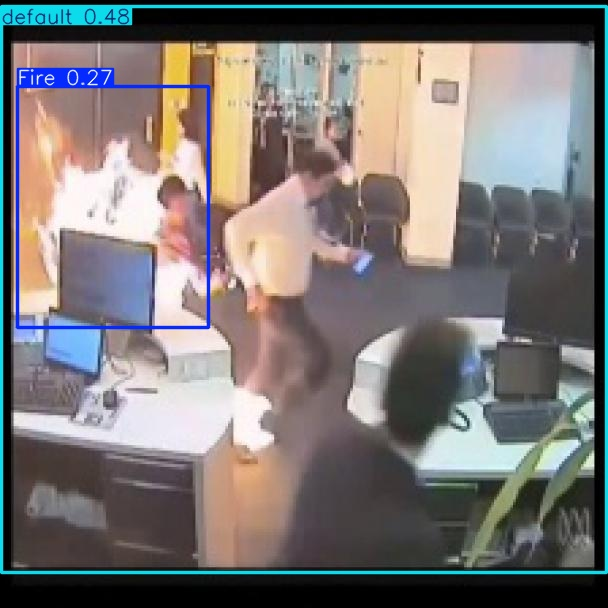

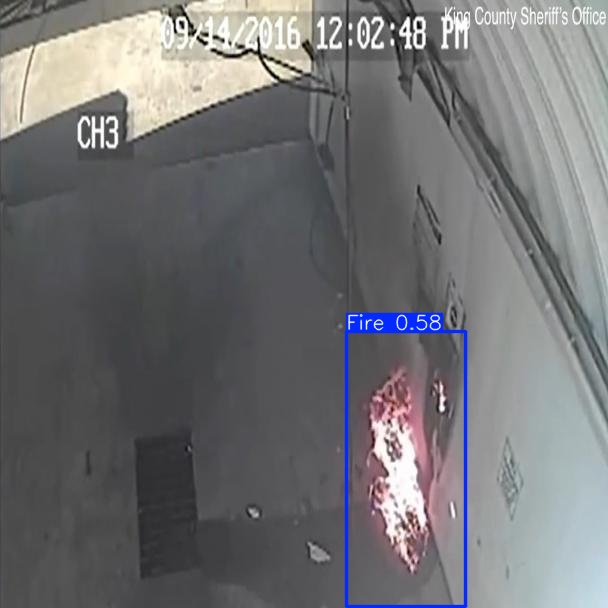

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:5]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source=/content/drive/MyDrive/fire3.mp4 save=True

Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs

video 1/1 (frame 1/1929) /content/drive/MyDrive/fire3.mp4: 384x640 (no detections), 57.0ms
video 1/1 (frame 2/1929) /content/drive/MyDrive/fire3.mp4: 384x640 1 default, 10.0ms
video 1/1 (frame 3/1929) /content/drive/MyDrive/fire3.mp4: 384x640 1 default, 9.0ms
video 1/1 (frame 4/1929) /content/drive/MyDrive/fire3.mp4: 384x640 1 default, 8.5ms
video 1/1 (frame 5/1929) /content/drive/MyDrive/fire3.mp4: 384x640 1 default, 8.2ms
video 1/1 (frame 6/1929) /content/drive/MyDrive/fire3.mp4: 384x640 1 default, 8.6ms
video 1/1 (frame 7/1929) /content/drive/MyDrive/fire3.mp4: 384x640 1 default, 8.2ms
video 1/1 (frame 8/1929) /content/drive/MyDrive/fire3.mp4: 384x640 1 default, 8.1ms
video 1/1 (frame 9/1929) /content/drive/MyDrive/fire3.mp4: 384x640 1 default, 9.2ms
video 1/1 (frame 10/1929) /content/drive/MyDrive/fire3.mp4: 384x640 1 

In [ ]:
!ls -lh runs/detect/predict2

total 173M
-rw-r--r-- 1 root root 173M Mar 27 06:11 fire3.avi


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Copy video kết quả vào Google Drive
!cp runs/detect/predict2/fire3.avi /content/drive/MyDrive/


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
files.download('/content/runs/detect/train2/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>